# Hackathon

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import openpyxl
from datetime import datetime, timedelta

In [32]:
data = pd.read_excel('Hack_concentraducto_v01.xlsx', sheet_name='Data_Hackathon')
df = data.copy()
df.head()

,tiempo,% Solido Bombeo concentrado_EB,Presión de Descarga_EB_1,Presión de Descarga_EB_2,Presion_Estación de Valvulas_EV1_1,Presion_Estación de Valvulas_EV1_2,Presión_SM-1,Presión_SM-2,Presión estación de valvulas 2_EV2_1,Presión estación de valvulas 2_EV2_2,Porcentaje de Solido Alimentación Espesador,Presión_EDT_1,Presión_EDT_2,Presión_EDT_3,Presión_SM-3,Presión_SM-4
0,2023-01-01 00:00:00,60.305771,-0.663051,1625.289917,3662.116943,3653.241699,16701.179688,3040.474121,3330.878174,3303.286377,59.756073,10653.394531,8614.203125,321.568634,2477.526611,1647.383789
1,2023-01-01 00:03:00,60.316761,-0.663393,1625.912354,3666.185059,3657.404053,16702.007812,3044.661621,3335.265137,3307.434814,59.675354,10658.351562,8619.733398,320.516357,2484.498535,1650.932861
2,2023-01-01 00:06:00,60.327747,-0.663736,1626.534790,3670.252930,3661.566406,16702.835938,3048.849121,3339.652100,3311.583252,59.709515,10658.579102,8621.905273,321.340149,2489.650879,1653.877686
3,2023-01-01 00:09:00,60.338734,-0.664078,1627.157349,3674.321045,3665.728760,16703.664062,3053.036621,3344.039062,3315.731689,59.712528,10663.964844,8622.951172,321.454895,2493.044678,1656.922974
4,2023-01-01 00:12:00,60.350990,-0.664420,1627.779785,3678.389160,3669.891357,16704.492188,3057.224121,3348.426025,3319.880127,59.747906,10667.239258,8625.802734,322.045898,2498.507568,1662.279785


In [33]:
delta_t = timedelta(minutes=3)

df['delta_tiempo'] = (df['tiempo'] - df['tiempo'].shift(1)) == delta_t

df.head()

,tiempo,% Solido Bombeo concentrado_EB,Presión de Descarga_EB_1,Presión de Descarga_EB_2,Presion_Estación de Valvulas_EV1_1,Presion_Estación de Valvulas_EV1_2,Presión_SM-1,Presión_SM-2,Presión estación de valvulas 2_EV2_1,Presión estación de valvulas 2_EV2_2,Porcentaje de Solido Alimentación Espesador,Presión_EDT_1,Presión_EDT_2,Presión_EDT_3,Presión_SM-3,Presión_SM-4,delta_tiempo
0,2023-01-01 00:00:00,60.305771,-0.663051,1625.289917,3662.116943,3653.241699,16701.179688,3040.474121,3330.878174,3303.286377,59.756073,10653.394531,8614.203125,321.568634,2477.526611,1647.383789,False
1,2023-01-01 00:03:00,60.316761,-0.663393,1625.912354,3666.185059,3657.404053,16702.007812,3044.661621,3335.265137,3307.434814,59.675354,10658.351562,8619.733398,320.516357,2484.498535,1650.932861,True
2,2023-01-01 00:06:00,60.327747,-0.663736,1626.534790,3670.252930,3661.566406,16702.835938,3048.849121,3339.652100,3311.583252,59.709515,10658.579102,8621.905273,321.340149,2489.650879,1653.877686,True
3,2023-01-01 00:09:00,60.338734,-0.664078,1627.157349,3674.321045,3665.728760,16703.664062,3053.036621,3344.039062,3315.731689,59.712528,10663.964844,8622.951172,321.454895,2493.044678,1656.922974,True
4,2023-01-01 00:12:00,60.350990,-0.664420,1627.779785,3678.389160,3669.891357,16704.492188,3057.224121,3348.426025,3319.880127,59.747906,10667.239258,8625.802734,322.045898,2498.507568,1662.279785,True


In [14]:
false_results = df.loc[~(df['delta_tiempo']), 'tiempo']

print(false_results)

0        2023-01-01 00:00:00
3615     2023-01-09 09:18:00
10331    2023-01-23 09:09:00
11152    2023-01-30 09:03:00
11158    2023-01-30 09:33:00
                 ...        
123791   2023-10-15 00:21:00
124046   2023-10-15 13:09:00
125044   2023-10-17 18:33:00
128538   2023-10-25 01:33:00
130714   2023-10-29 14:27:00
Name: tiempo, Length: 82, dtype: datetime64[ns]


In [11]:
min_concentrated = df1["Presión de Descarga_EB_1"].min()
min_concentrated

-7.87132453918457

In [15]:
df2 = df.copy()

# Factor de conversión de psi a kPa
conversion = 6.89476

df2['Presión de Descarga_EB_1'] = df2['Presión de Descarga_EB_1'].apply(lambda x: x * conversion)
df2['Presión de Descarga_EB_2'] = df2['Presión de Descarga_EB_2'].apply(lambda x: x * conversion)

df2.head()


,tiempo,% Solido Bombeo concentrado_EB,Presión de Descarga_EB_1,Presión de Descarga_EB_2,Presion_Estación de Valvulas_EV1_1,Presion_Estación de Valvulas_EV1_2,Presión_SM-1,Presión_SM-2,Presión estación de valvulas 2_EV2_1,Presión estación de valvulas 2_EV2_2,Porcentaje de Solido Alimentación Espesador,Presión_EDT_1,Presión_EDT_2,Presión_EDT_3,Presión_SM-3,Presión_SM-4,cumpledelta_tiempo,delta_tiempo
0,2023-01-01 00:00:00,60.305771,-4.571580,11205.983908,3662.116943,3653.241699,16701.179688,3040.474121,3330.878174,3303.286377,59.756073,10653.394531,8614.203125,321.568634,2477.526611,1647.383789,False,False
1,2023-01-01 00:03:00,60.316761,-4.573939,11210.275459,3666.185059,3657.404053,16702.007812,3044.661621,3335.265137,3307.434814,59.675354,10658.351562,8619.733398,320.516357,2484.498535,1650.932861,True,True
2,2023-01-01 00:06:00,60.327747,-4.576298,11214.567009,3670.252930,3661.566406,16702.835938,3048.849121,3339.652100,3311.583252,59.709515,10658.579102,8621.905273,321.340149,2489.650879,1653.877686,True,True
3,2023-01-01 00:09:00,60.338734,-4.578656,11218.859401,3674.321045,3665.728760,16703.664062,3053.036621,3344.039062,3315.731689,59.712528,10663.964844,8622.951172,321.454895,2493.044678,1656.922974,True,True
4,2023-01-01 00:12:00,60.350990,-4.581015,11223.150952,3678.389160,3669.891357,16704.492188,3057.224121,3348.426025,3319.880127,59.747906,10667.239258,8625.802734,322.045898,2498.507568,1662.279785,True,True


In [16]:
from sklearn.preprocessing import StandardScaler

excluded_columns = ['tiempo', 'delta_tiempo']
normalize_columns = [col for col in df2.columns if col not in excluded_columns]

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df2[normalize_columns]), columns=normalize_columns)
df_normalized = pd.concat([df2[excluded_columns], df_normalized], axis=1)

df_normalized.head()

,tiempo,delta_tiempo,% Solido Bombeo concentrado_EB,Presión de Descarga_EB_1,Presión de Descarga_EB_2,Presion_Estación de Valvulas_EV1_1,Presion_Estación de Valvulas_EV1_2,Presión_SM-1,Presión_SM-2,Presión estación de valvulas 2_EV2_1,Presión estación de valvulas 2_EV2_2,Porcentaje de Solido Alimentación Espesador,Presión_EDT_1,Presión_EDT_2,Presión_EDT_3,Presión_SM-3,Presión_SM-4,cumpledelta_tiempo
0,2023-01-01 00:00:00,False,0.676361,-0.888155,0.640947,-0.512923,-0.473959,0.297110,-0.598113,-0.296108,-0.265657,0.689224,0.741226,0.250059,-0.273894,-0.610556,-0.569872,-40.088926
1,2023-01-01 00:03:00,True,0.676792,-0.888155,0.641606,-0.510222,-0.471060,0.297365,-0.595322,-0.290618,-0.260154,0.686171,0.744167,0.252552,-0.275045,-0.604165,-0.564942,0.024945
2,2023-01-01 00:06:00,True,0.677222,-0.888155,0.642264,-0.507522,-0.468160,0.297621,-0.592531,-0.285128,-0.254651,0.687463,0.744302,0.253532,-0.274144,-0.599441,-0.560852,0.024945
3,2023-01-01 00:09:00,True,0.677653,-0.888156,0.642923,-0.504821,-0.465260,0.297876,-0.589740,-0.279638,-0.249149,0.687577,0.747496,0.254003,-0.274018,-0.596330,-0.556622,0.024945
4,2023-01-01 00:12:00,True,0.678133,-0.888156,0.643582,-0.502120,-0.462361,0.298132,-0.586949,-0.274148,-0.243646,0.688915,0.749439,0.255289,-0.273371,-0.591322,-0.549181,0.024945


In [29]:
df_normalized.rename(columns=
           {'tiempo': 'T',
            '% Solido  Bombeo concentrado_EB': 'EB%', 
            'Presión de Descarga_EB_1': 'EB1',
            'Presión de Descarga_EB_2': 'EB2',
            'Presion_Estación de Valvulas_EV1_1': 'EV1_1',
            'Presión estación de valvulas 2_EV2_1': 'EV2_1',
            'Presion_Estación de Valvulas_EV1_2': 'EV1_2',
            'Presión estación de valvulas 2_EV2_2': 'EV2_2',
            'Presión_SM-1': 'SM1',
            'Presión_SM-2': 'SM2',
            'Presión_SM-3': 'SM3',
            'Presión_SM-4': 'SM4',
            'Porcentaje de Solido Alimentación Espesador': 'EDT%',
            'Presión_EDT_1': 'EDT1',
            'Presión_EDT_2': 'EDT2',
            'Presión_EDT_3': 'EDT3',
            }
                     ,inplace=True)

df_normalized.tail()

,T,delta_tiempo,EB%,EB1,EB2,EV1_1,EV1_2,SM1,SM2,EV2_1,EV2_2,EDT%,EDT1,EDT2,EDT3,SM3,SM4,cumpledelta_tiempo
131861,2023-10-31 23:48:00,True,-1.293095,-0.798072,0.180862,0.787953,0.889284,-0.710054,0.829388,0.991283,1.095711,0.758665,1.012828,0.487319,-0.254528,0.842622,0.579023,0.024945
131862,2023-10-31 23:51:00,True,-1.295770,-0.798129,0.188719,0.768224,0.869233,-0.703614,0.820663,0.957381,1.059247,0.759124,0.999421,0.488723,-0.254424,0.814957,0.550139,0.024945
131863,2023-10-31 23:54:00,True,-1.298445,-0.798186,0.196575,0.749769,0.850034,-0.700680,0.815650,0.933253,1.034910,0.759189,0.990946,0.476701,-0.253795,0.794084,0.522549,0.024945
131864,2023-10-31 23:57:00,True,-1.295058,-0.798243,0.204432,0.732549,0.831234,-0.696786,0.806091,0.912800,1.014845,0.756277,0.982946,0.475478,-0.254224,0.774074,0.498706,0.024945
131865,2023-11-01 00:00:00,True,-1.294383,-0.798299,0.212289,0.718185,0.817835,-0.690647,0.795717,0.890740,0.992582,0.756546,0.974363,0.466299,-0.256018,0.752311,0.478874,0.024945


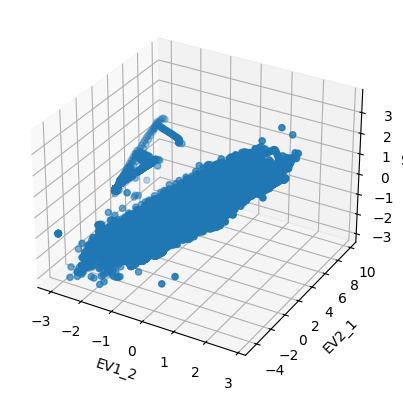

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_normalized['EV1_2'], df_normalized['EV2_1'], df_normalized['SM3'])

ax.set_xlabel('EV1_2')
ax.set_ylabel('EV2_1')
ax.set_zlabel('SM3')

plt.show()

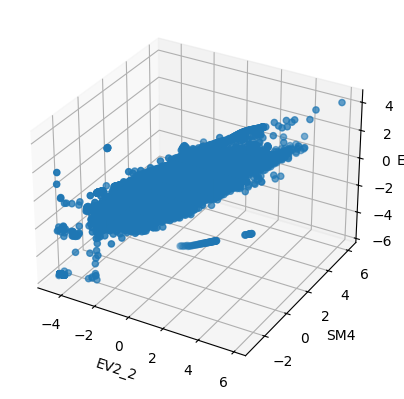

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_normalized['EV2_2'], df_normalized['SM4'], df_normalized['EDT1'])

ax.set_xlabel('EV2_2')
ax.set_ylabel('SM4')
ax.set_zlabel('EDT1')

plt.show()

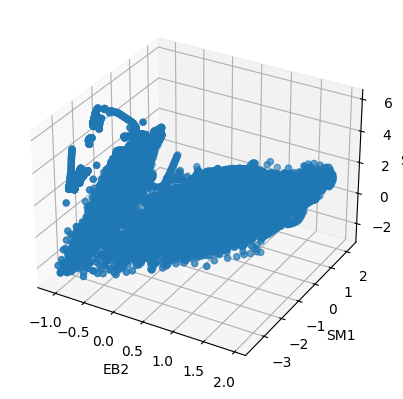

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_normalized['EB2'], df_normalized['SM1'], df_normalized['SM2'])

ax.set_xlabel('EB2')
ax.set_ylabel('SM1')
ax.set_zlabel('SM2')

plt.show()

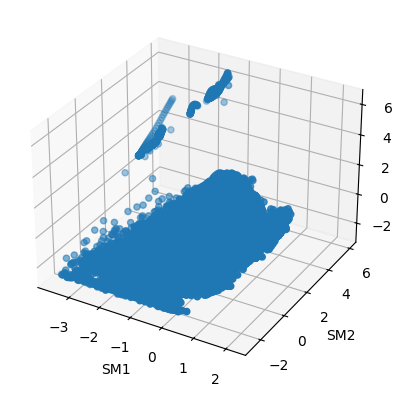

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_normalized['SM1'], df_normalized['SM2'], df_normalized['EV1_1'])

ax.set_xlabel('SM1')
ax.set_ylabel('SM2')
ax.set_zlabel('EV1_1')

plt.show()